# Improting Relevant Laibraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df=pd.read_csv('HousePricing.csv')

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1.50,1340,7912,1.5,0,3,1340,0,1955,2005
1,2384000.0,5,2.50,3650,9050,2.0,4,5,3370,280,1921,0
2,342000.0,3,2.00,1930,11947,1.0,0,4,1930,0,1966,0
3,420000.0,3,2.25,2000,8030,1.0,0,4,1000,1000,1963,0
4,550000.0,4,2.50,1940,10500,1.0,0,4,1140,800,1976,1992


In [4]:
df.describe(include='all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
X = df.drop('price', axis = 1)
y = df['price']

In [6]:
data=df.reset_index()

# Train Teat Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [8]:
y.shape

(4600,)

# Scaling The Inputs

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [10]:
X_test_scaled

array([[ 0.65556839,  0.11045493,  0.99117383, ..., -0.67927447,
        -0.0362029 , -0.83278755],
       [-0.4402218 ,  0.42934156,  0.57777853, ..., -0.67927447,
         1.4118153 ,  1.12756409],
       [-1.53601199, -1.48397821, -1.26660048, ..., -0.67927447,
        -2.02301855,  1.16018565],
       ...,
       [ 0.65556839, -0.20843169,  0.52477914, ..., -0.67927447,
        -0.6086752 ,  1.18872951],
       [-0.4402218 , -0.52731832, -0.85320519, ..., -0.67927447,
         0.90669267,  1.21217625],
       [ 1.75135858,  2.0237747 ,  3.38674658, ...,  3.17350147,
         1.17609141, -0.83278755]])

In [11]:
X_train.shape,X_test.shape

((3450, 11), (1150, 11))

# NN Model

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
input_size=11
output_size=1

model=tf.keras.Sequential([
    
                            
                            tf.keras.layers.Dense(11,activation='softplus'),
    
                            tf.keras.layers.Dense(128,activation='softplus'),
                            tf.keras.layers.Dense(64,activation='softplus'),
                            tf.keras.layers.Dense(64,activation='softplus'),
                            tf.keras.layers.Dense(10,activation='softplus'),
                            tf.keras.layers.Dense(1,activation='softplus')
                    
                        ])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=('mean_absolute_error'))


history=model.fit(X_train_scaled, y_train, epochs=125, validation_split = 0.2,verbose=2)
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/125
87/87 - 1s - loss: 562540.3125 - val_loss: 526167.1875
Epoch 2/125
87/87 - 0s - loss: 513050.1875 - val_loss: 343757.2812
Epoch 3/125
87/87 - 0s - loss: 263627.8438 - val_loss: 207063.3906
Epoch 4/125
87/87 - 0s - loss: 211886.5469 - val_loss: 188940.3906
Epoch 5/125
87/87 - 0s - loss: 195150.6250 - val_loss: 180769.4531
Epoch 6/125
87/87 - 0s - loss: 186911.0000 - val_loss: 175528.3281
Epoch 7/125
87/87 - 0s - loss: 182669.9375 - val_loss: 171787.6250
Epoch 8/125
87/87 - 0s - loss: 179543.3750 - val_loss: 168995.6406
Epoch 9/125
87/87 - 0s - loss: 177241.4531 - val_loss: 166507.7656
Epoch 10/125
87/87 - 0s - loss: 175846.1719 - val_loss: 164572.9219
Epoch 11/125
87/87 - 0s - loss: 174589.0938 - val_loss: 162932.5469
Epoch 12/125
87/87 - 0s - loss: 173828.8750 - val_loss: 161875.5781
Epoch 13/125
87/87 - 0s - loss: 173143.5781 - val_loss: 161358.5469
Epoch 14/125
87/87 - 0s - loss: 173084.1250 - val_loss: 159891.6094
Epoch 15/125
87/87 - 0s - loss: 171938.2500 - val_loss: 1

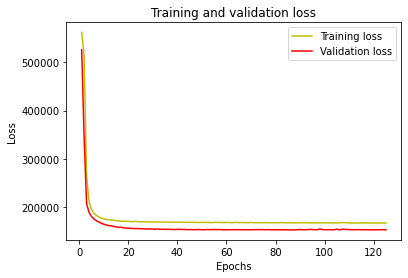

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This graph shows us that we are not overfitting since validation loss is always less than the training loss

# Prediction on test DataSet

In [15]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[828730.3 ]
 [568139.75]
 [412124.34]
 [675294.94]
 [276230.8 ]]
Real values are:  2899    600000.0
61      459990.0
1627    399000.0
202     562000.0
2374    405000.0
Name: price, dtype: float64


In [16]:
mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean absolute error from neural net: ', mae_neural)

36/36 [==============================] - 0s 1ms/step - loss: 156347.6719
Mean absolute error from neural net:  156347.671875


# Linear regression

In [17]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean absolute error from linear regression:  162463.5442164709


# Decision tree

In [19]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean absolute error using decision tree: ', mae_dt)

Mean absolute error using decision tree:  227765.6481497391


# Random forest.
#Increasing the number of tress and seeing the effect

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=30, random_state=30)

In [21]:
y_pred_RF = model.predict(X_test_scaled)

In [22]:
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean absolute error Using Random Forest:  171133.57828058646


### Features by Importance

In [23]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

sqft_living      0.361767
sqft_lot         0.182554
yr_built         0.145491
bathrooms        0.079503
sqft_above       0.075857
condition        0.043626
bedrooms         0.029093
yr_renovated     0.024353
sqft_basement    0.021691
floors           0.018902
view             0.017163
dtype: float64
